In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [7]:
estacoes = [f for f in os.listdir("estacoes12X") if f.endswith('.csv')]
print(estacoes)

print(len(estacoes))

#Remover os dias de abril
#for est in estacoes:
#    df = pd.read_csv(f"estacoes12X/{est}")
#    df = df.drop(df.index[:2])
#    df.to_csv(f"estacoes12X/{est}", index=False)


fwi = 0

for h in range(0, 31):
    for est in estacoes:
        df = pd.read_csv(f"estacoes12X/{est}")
        fwi += df["dc"].iloc[h]

    with open("dc.txt", "a") as f:
        med_fwi = fwi / len(estacoes)
        hora = df["hourly.time"].iloc[h]
        f.write(f"{hora},{med_fwi}\n")

    fwi = 0

['fwi_ipma_14.csv', 'fwi_ipma_57.csv', 'fwi_ipma_74.csv', 'fwi_ipma_40.csv', 'fwi_ipma_5.csv', 'fwi_ipma_28.csv', 'fwi_ipma_43.csv', 'fwi_ipma_46.csv', 'fwi_ipma_26.csv', 'fwi_ipma_13.csv', 'fwi_ipma_23.csv', 'fwi_ipma_29.csv', 'fwi_ipma_56.csv', 'fwi_ipma_48.csv', 'fwi_ipma_31.csv', 'fwi_ipma_39.csv', 'fwi_ipma_60.csv', 'fwi_ipma_50.csv', 'fwi_ipma_72.csv', 'fwi_ipma_63.csv', 'fwi_ipma_20.csv', 'fwi_ipma_35.csv', 'fwi_ipma_47.csv', 'fwi_ipma_71.csv', 'fwi_ipma_25.csv', 'fwi_ipma_67.csv', 'fwi_ipma_62.csv', 'fwi_ipma_24.csv', 'fwi_ipma_37.csv', 'fwi_ipma_15.csv', 'fwi_ipma_70.csv', 'fwi_ipma_55.csv', 'fwi_ipma_69.csv', 'fwi_ipma_44.csv', 'fwi_ipma_59.csv', 'fwi_ipma_61.csv', 'fwi_ipma_27.csv', 'fwi_ipma_6.csv', 'fwi_ipma_32.csv', 'fwi_ipma_21.csv', 'fwi_ipma_18.csv', 'fwi_ipma_38.csv', 'fwi_ipma_2.csv', 'fwi_ipma_78.csv', 'fwi_ipma_0.csv', 'fwi_ipma_76.csv', 'fwi_ipma_49.csv', 'fwi_ipma_54.csv', 'fwi_ipma_3.csv', 'fwi_ipma_19.csv', 'fwi_ipma_65.csv', 'fwi_ipma_36.csv', 'fwi_ipma_33.csv

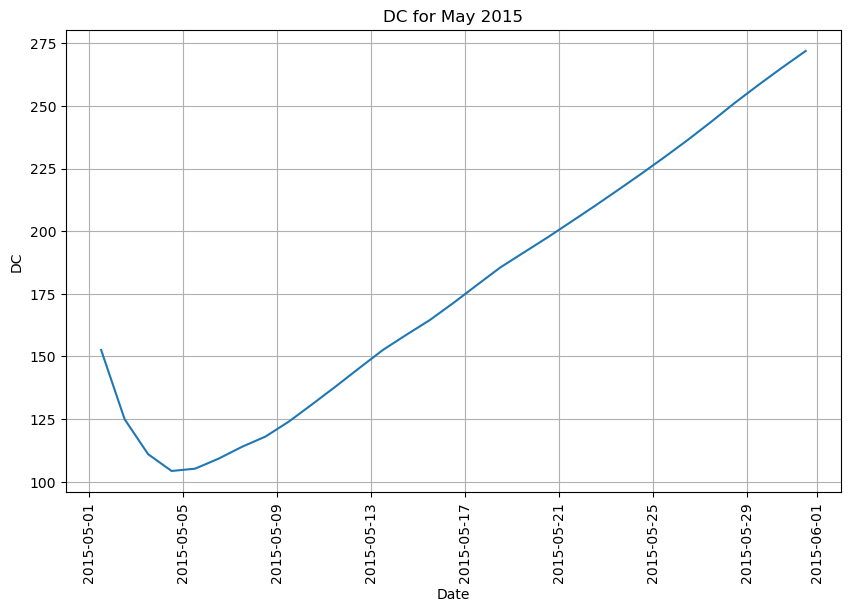

In [8]:
import matplotlib.pyplot as plt

data = []

with open('dc.txt', 'r') as f:
    for line in f:
        date, fwi = line.split(',')
        data.append((pd.to_datetime(date), float(fwi)))


data.sort()

dates, fwi_values = zip(*data)

plt.figure(figsize=(10, 6))
plt.plot(dates, fwi_values)
plt.xlabel('Date')
plt.ylabel('DC')
plt.title('DC for May 2015')

plt.xticks(rotation=90)
plt.grid(True)
plt.savefig('dc_plot.png', dpi=300, bbox_inches='tight')
plt.show()